# <center>Juego Navegación en un Laberinto<center>

Desarrollar un laberinto simple y aplicar algoritmo de aprendizaje por refuerzo para enseñar a una IA a navegar desde un punto inicial a un objetivo

##### Descripción del laberinto

El laberinto se representa como una matriz de dos dimnesiones, donde cada elemento puede ser:

- camino libre (0)
- obstáculo (1)
- objetivo (G)

Se debe desarrollar un agente que pueda aprender a encontrar el camino desde un punto de inicio hasta el objetivo evitando obstáculos

In [93]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Creación del laberinto

In [94]:
def crear_laberinto(tamanio, porcentaje_paredes=20, inicio=(0,0), meta=None):
    laberinto = np.zeros((tamanio, tamanio))
    numero_paredes = int((tamanio**2) * porcentaje_paredes / 100)
    
    for pared in range(numero_paredes):
        x = random.randint(0, tamanio-1)
        y = random.randint(0, tamanio-1)
        
        if (x, y) != inicio and (meta is None or (x, y) != meta):
            laberinto[x, y] = 1
    
    if meta:
        laberinto[meta] = 9
    else:
        while True:
            x = random.randint(0, tamanio-1)
            y = random.randint(0, tamanio-1)
            if laberinto[x, y] == 0 and (x, y) != inicio:
                laberinto[x, y] = 9
                break
    
    return laberinto

In [95]:
def mostrar_laberinto(laberinto):
    plt.figure(figsize=(10, 10))
    plt.imshow(laberinto, cmap='hot', interpolation='nearest')
    plt.show()

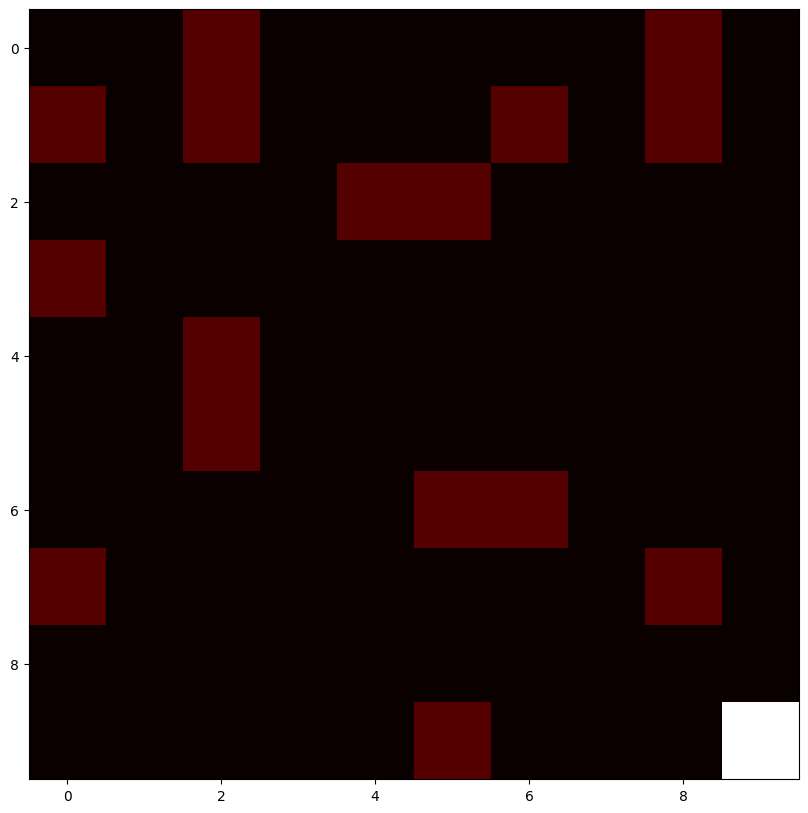

In [96]:
laberinto = crear_laberinto(10, porcentaje_paredes=20, inicio=(0,0), meta=(9,9))
mostrar_laberinto(laberinto)

### Parámetro para Algoritmo Q-Learning

In [97]:
alpha = 0.1
gamma = 0.9
epsilon = 0.1
episodios = 1000

### Elegir acciones equilibrando entre eplotación y exploración

In [98]:
def epsilon_codicioso(Q, estado, tamanio):
    if random.uniform(0, 1) < epsilon:
        return random.randint(0, 3) # 0: arriba, 1: derecha, 2: abajo, 3: izquierda
    else:
        return np.argmax(Q[estado])

### Simular acciones en el laberinto

In [99]:
def ejecutar_accion(estado, accion, laberinto, tamanio):
    fila, columna = divmod(estado, tamanio)
    if accion == 0 and fila > 0: # arriba
        fila -= 1
    elif accion == 1 and fila < tamanio-1: # abajo
        fila += 1
    elif accion == 2 and columna > 0: # izquierda
        columna -= 1
    elif accion == 3 and columna < tamanio-1: # derecha
        columna += 1
        
    siguiente_estado = fila * tamanio + columna
    if laberinto[fila, columna] == 1:
        recompensa = -100
        siguiente_estado = estado
        terminado = False
    elif laberinto[fila, columna] == 9:
        recompensa = 100
        terminado = True
    else:
        recompensa = -1
        terminado = False
    return siguiente_estado, recompensa, terminado

### Ejecutar algoritmo Q-Learning

In [100]:
def q_learning(laberinto, tamanio, inicio, meta):
    Q = np.zeros((tamanio**2, 4))
    
    for episodio in range(episodios):
        estado = inicio
        terminado = False
        
        while not terminado:
            accion = epsilon_codicioso(Q, estado, tamanio)
            siguiente_estado, recompensa, terminado = ejecutar_accion(estado, accion, laberinto, tamanio)
            Q[estado, accion] += alpha * (recompensa + gamma * np.max(Q[siguiente_estado]) - Q[estado, accion])
            estado = siguiente_estado
    
    return Q

### Convertir coordenadas a índice lineal

In [101]:
def index_posicion(posicion, tamanio):
    return posicion[0] * tamanio + posicion[1]

### Iniciar laberinto y configurar alforitmo Q-Learning

In [103]:
tamanio = 10
posicion_inicial = (0, 0)
posicion_meta = (9, 9)
laberinto = crear_laberinto(tamanio, porcentaje_paredes=20, inicio=posicion_inicial, meta=posicion_meta)
inicio = index_posicion(posicion_inicial, tamanio)
meta = index_posicion(posicion_meta, tamanio)
valores_q = q_learning(laberinto, tamanio, inicio, meta)

### Aprendizaje del Agente

In [104]:
def mostrar_ruta(laberinto, Q, inicio, meta, tamanio):
    fila, columna = divmod(inicio, tamanio)
    ruta = [(fila, columna)]
    estado = inicio
    
    while estado != meta:
        accion = np.argmax(Q[estado])
        estado, _ , _ = ejecutar_accion(estado, accion, laberinto, tamanio)
        fila, columna = divmod(estado, tamanio)
        ruta.append((fila, columna))
    
    plt.figure(figsize=(10, 10))
    plt.imshow(laberinto, cmap='hot', interpolation='nearest')
    filas, columnas = zip(*ruta)
    plt.plot(columnas, filas, marker='o', color='blue')
    plt.show()

### Resultado

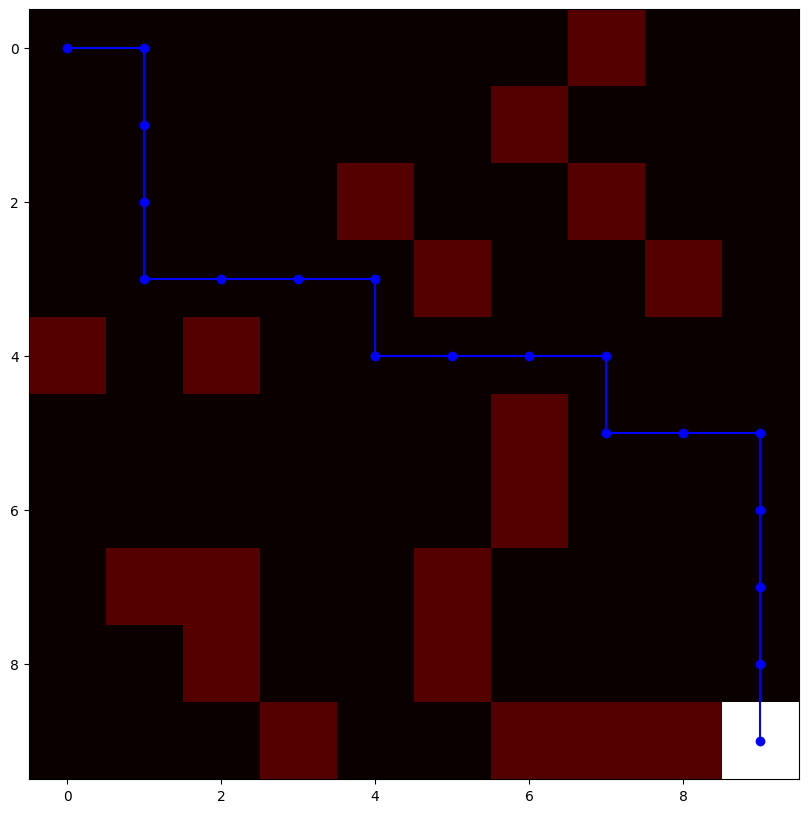

In [105]:
mostrar_ruta(laberinto, valores_q, inicio, meta, tamanio)